# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [16]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [17]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  object 
 2   MODEL            22556 non-null  object 
 3   VEHICLE CLASS    22556 non-null  object 
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  object 
 7   FUEL             22556 non-null  object 
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [18]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [19]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print('EMISSIONS:')
print(f'산술평균: {df['EMISSIONS'].mean():.2f}')
print(f'중앙값: {df['EMISSIONS'].median():.2f}')
print(f'최빈값: {df['EMISSIONS'].mode().values}')

# TODO 2: 절사평균 계산
print(f'절사평균 (10%): {stats.trim_mean(df['EMISSIONS'], 0.1):.2f}') # 상,하 10% 제거 후 평균
print(f'절사평균 (20%): {stats.trim_mean(df['EMISSIONS'], 0.2):.2f}') # 상,하 20% 제거 후 평균

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
df2 = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])]
class_mean = df2.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
# display(class_mean.round(2))

# VEHICLE CLASS
# COMPACT     211.04
# MID-SIZE    223.39
# SUV         270.30

weights = np.array([50, 30, 20])
weighted_mean = np.average(class_mean, weights=weights)
print(f'가중평균: {weighted_mean:.2f}')

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
class_stats = df2.groupby('VEHICLE CLASS')['EMISSIONS'].agg([
    ('평균', 'mean'),
    ('중앙값', 'median')
]).round(2)
display(class_stats)

# TODO 5: 결과 해석 (print문으로 작성)
print(
"""
결과 해석:
SUV의 CO2 배출량이 COMPACT, MID-SIZE 등급에 비해 훨씬 많다.
→ 차량 크기가 커질 수록 CO2 배출량이 늘어난다.
산술평균 > 중앙값 이므로 오른쪽으로 꼬리가 긴 분포를 보일 것이다.
"""
)

EMISSIONS:
산술평균: 250.07
중앙값: 243.00
최빈값: [221]
절사평균 (10%): 247.34
절사평균 (20%): 245.40
가중평균: 226.94


,평균,중앙값
VEHICLE CLASS,,
COMPACT,211.54,207.0
MID-SIZE,223.70,221.0
SUV,270.30,267.0



결과 해석:
SUV의 CO2 배출량이 COMPACT, MID-SIZE 등급에 비해 훨씬 많다.
→ 차량 크기가 커질 수록 CO2 배출량이 늘어난다.
산술평균 > 중앙값 이므로 오른쪽으로 꼬리가 긴 분포를 보일 것이다.



---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

COMB (L/100 km):

범위(max-min): 22.5000
분산: 8.4735
표준편차: 2.9109
Q1: 9.1
Q2: 10.6
Q3: 12.7
IQR: 3.6000

ENGINE SIZE:

범위(max-min): 7.6000
분산: 1.7834
표준편차: 1.3354
Q1: 2.3
Q2: 3.0
Q3: 4.2
IQR: 1.9000

COMB (L/100 km) 변동계수(CV): 26.3806
ENGINE SIZE 변동계수(CV): 39.7845

COMB (L/100 km) IQR 이상치:
COMB (L/100 km) IQR 이상치 개수: 548


209    18.4
210    18.3
211    19.9
212    19.2
213    19.9
Name: COMB (L/100 km), dtype: float64


ENGINE SIZE IQR 이상치:
ENGINE SIZE IQR 이상치 개수: 41


207     8.0
208     8.0
867     8.0
868     8.0
1568    8.0
Name: ENGINE SIZE, dtype: float64

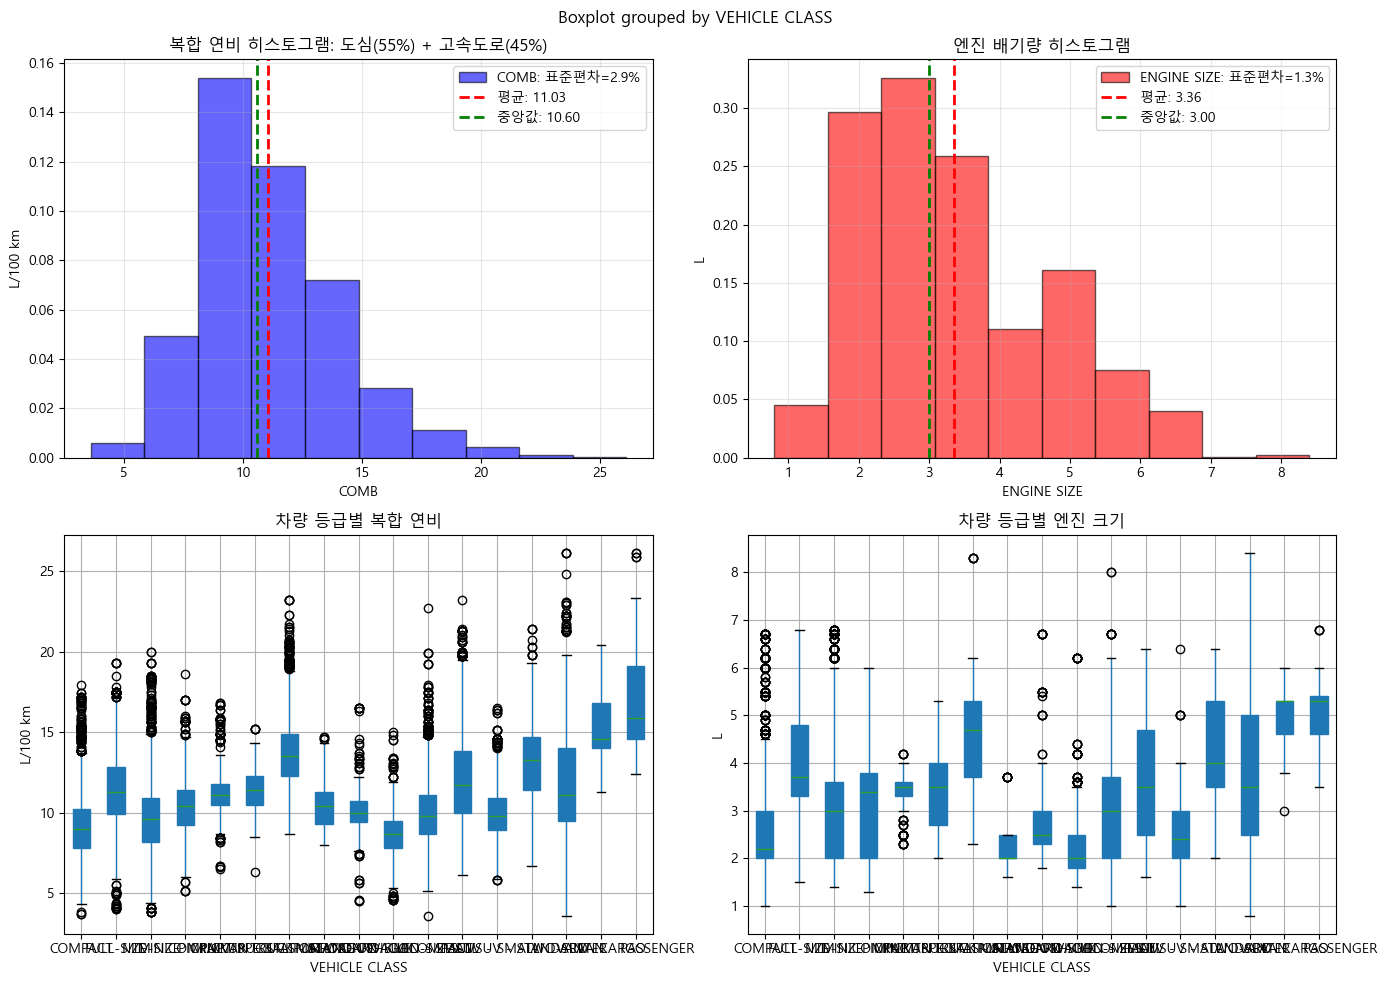


COMB (L/100 km):


,표준편차
VEHICLE CLASS,
COMPACT,2.06
MID-SIZE,2.40
SUV,2.71



ENGINE SIZE:


,표준편차
VEHICLE CLASS,
COMPACT,1.08
MID-SIZE,1.19
SUV,1.20




결과 해석:
1) 변동계수를 보았을 때, ENGINE SIZE가 COMB보다 변동계수가 더 높다.
→ 평균을 기준으로 엔진 크기 분포가 연비 분포보다 더 넓게 퍼져있다.

2) 이상치의 개수를 살펴보았을 때, COMB의 이상치의 개수가 매우 많다.
히스토그램으로 확인해보면 20L/100 km을 넘어가는 연비가 낮은(저효율) 차량이 많다.
ENGINE SIZE의 이상치 개수도 적지 않은데, 마찬가지로 히스토그램으로 보면 엔진 크기가 8L 정도되는 차량이 존재한다.

3) 차량 등급별 표준편차를 살펴보았을때, 연비와 엔진 크기 모두 차량 크기가 커질 수록 표준편차가 커지는 경향이 있다. 



In [20]:
# TODO 1: 두 변수의 산포 측도 계산 (범위, 분산, 표준편차, IQR)
print('='*50)
comb = df['COMB (L/100 km)']
size = df['ENGINE SIZE']

# 1-1) COMB
print('COMB (L/100 km):' +'\n')
print(f'범위(max-min): {comb.max() - comb.min():.4f}')
print(f'분산: {comb.var():.4f}')
print(f'표준편차: {comb.std():.4f}')

Q1_comb = comb.quantile(0.25) 
Q2_comb = comb.quantile(0.5) 
Q3_comb = comb.quantile(0.75) 
print(f"Q1: {Q1_comb}") 
print(f"Q2: {Q2_comb}") 
print(f"Q3: {Q3_comb}") 
print(f"IQR: {Q3_comb - Q1_comb:.4f}") 

# 1-2) SIZE
print("\n" + '='*50)
print('ENGINE SIZE:' + '\n')
print(f'범위(max-min): {size.max() - size.min():.4f}')
print(f'분산: {size.var():.4f}')
print(f'표준편차: {size.std():.4f}')

Q1_size = size.quantile(0.25) 
Q2_size = size.quantile(0.5) 
Q3_size = size.quantile(0.75) 
print(f"Q1: {Q1_size}") 
print(f"Q2: {Q2_size}") 
print(f"Q3: {Q3_size}") 
print(f"IQR: {Q3_size - Q1_size:.4f}") 


# TODO 2: 변동계수(CV) 계산
print("\n" + '='*50)
def cv(data):
    return (data.std() / data.mean()) * 100

# 2-1) comb 변동계수
cv_comb = cv(comb)
print(f'COMB (L/100 km) 변동계수(CV): {cv_comb:.4f}')

# 2-2) size 변동계수
cv_size = cv(size)
print(f'ENGINE SIZE 변동계수(CV): {cv_size:.4f}')


# TODO 3: 이상치 탐지 (IQR, Z-score)
print("\n" + '='*50)
# 3-1) IQR
# 3-1-1) comb
IQR_comb = Q3_comb - Q1_comb
iqr_lower_comb = Q1_comb - 1.5 * IQR_comb
iqr_upper_comb = Q3_comb + 1.5 * IQR_comb
iqr_outliers_comb = comb[(comb < iqr_lower_comb) | (comb > iqr_upper_comb)]
print('COMB (L/100 km) IQR 이상치:')
print('COMB (L/100 km) IQR 이상치 개수:', len(iqr_outliers_comb))
display(iqr_outliers_comb.head())

# 3-1-2) size
print("\n" + '='*50)
IQR_size = Q3_size - Q1_size
iqr_lower_size = Q1_size - 1.5 * IQR_size
iqr_upper_size = Q3_size + 1.5 * IQR_size
iqr_outliers_size = size[(size < iqr_lower_size) | (size > iqr_upper_size)]
print('ENGINE SIZE IQR 이상치:')
print('ENGINE SIZE IQR 이상치 개수:', len(iqr_outliers_size))
display(iqr_outliers_size.head())

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 4-1) 히스토그램
# 4-1-1) comb
axes[0, 0].hist(comb, alpha=0.6, color='blue', edgecolor='black',
             label=f'COMB: 표준편차={comb.std():.1f}%', density=True)
axes[0, 0].axvline(comb.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {comb.mean():.2f}')
axes[0, 0].axvline(comb.median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {comb.median():.2f}')
axes[0, 0].set_xlabel('COMB')
axes[0, 0].set_ylabel('L/100 km')
axes[0, 0].set_title('복합 연비 히스토그램: 도심(55%) + 고속도로(45%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 4-1-2) size
axes[0, 1].hist(size, alpha=0.6, color='red', edgecolor='black',
             label=f'ENGINE SIZE: 표준편차={size.std():.1f}%', density=True)
axes[0, 1].axvline(size.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {size.mean():.2f}')
axes[0, 1].axvline(size.median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {size.median():.2f}')
axes[0, 1].set_xlabel('ENGINE SIZE')
axes[0, 1].set_ylabel('L')
axes[0, 1].set_title('엔진 배기량 히스토그램')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# 4-2) 박스플롯(차량 등급별 comb, size)
# 4-2-1) comb
df.boxplot(column='COMB (L/100 km)', by='VEHICLE CLASS', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('차량 등급별 복합 연비')
axes[1, 0].set_xlabel('VEHICLE CLASS')
axes[1, 0].set_ylabel('L/100 km')

# 4-2-2) size
df.boxplot(column='ENGINE SIZE', by='VEHICLE CLASS', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('차량 등급별 엔진 크기')
axes[1, 1].set_xlabel('VEHICLE CLASS')
axes[1, 1].set_ylabel('L')


plt.tight_layout()
plt.show()


# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print("\n" + '='*50)
print('COMB (L/100 km):')
class_stats_comb = df2.groupby('VEHICLE CLASS')['COMB (L/100 km)'].agg([
    ('표준편차', 'std'),
]).round(2)
display(class_stats_comb)

print("\n" + '='*50)
print('ENGINE SIZE:')
class_stats_comb = df2.groupby('VEHICLE CLASS')['ENGINE SIZE'].agg([
    ('표준편차', 'std'),
]).round(2)
display(class_stats_comb)


# TODO 6: 결과 해석
# COMB (L/100 km) 변동계수(CV): 26.3806
# ENGINE SIZE 변동계수(CV): 39.7845

# COMB (L/100 km) IQR 이상치 개수: 548
# ENGINE SIZE IQR 이상치 개수: 41

print("\n" + '='*50)
print(
"""
결과 해석:
1) 변동계수를 보았을 때, ENGINE SIZE가 COMB보다 변동계수가 더 높다.
→ 평균을 기준으로 엔진 크기 분포가 연비 분포보다 더 넓게 퍼져있다.

2) 이상치의 개수를 살펴보았을 때, COMB의 이상치의 개수가 매우 많다.
히스토그램으로 확인해보면 20L/100 km을 넘어가는 연비가 낮은(저효율) 차량이 많다.
ENGINE SIZE의 이상치 개수도 적지 않은데, 마찬가지로 히스토그램으로 보면 엔진 크기가 8L 정도되는 차량이 존재한다.

3) 차량 등급별 표준편차를 살펴보았을때, 연비와 엔진 크기 모두 차량 크기가 커질 수록 표준편차가 커지는 경향이 있다. 
"""
)

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

ENGINE SIZE
왜도: 0.6313
첨도: -0.3949

COMB (L/100 km)
왜도: 0.8171
첨도: 1.0546

COMB (mpg)
왜도: 1.1728
첨도: 3.6436

EMISSIONS
왜도: 0.5346
첨도: 0.6154



,왜도,첨도,왜도 해석,첨도 해석
ENGINE SIZE,0.6313,-0.3949,오른쪽 꼬리,꼬리가 얇음
COMB (L/100 km),0.8171,1.0546,오른쪽 꼬리,꼬리가 두꺼움
COMB (mpg),1.1728,3.6436,오른쪽 꼬리,꼬리가 두꺼움
EMISSIONS,0.5346,0.6154,오른쪽 꼬리,꼬리가 두꺼움


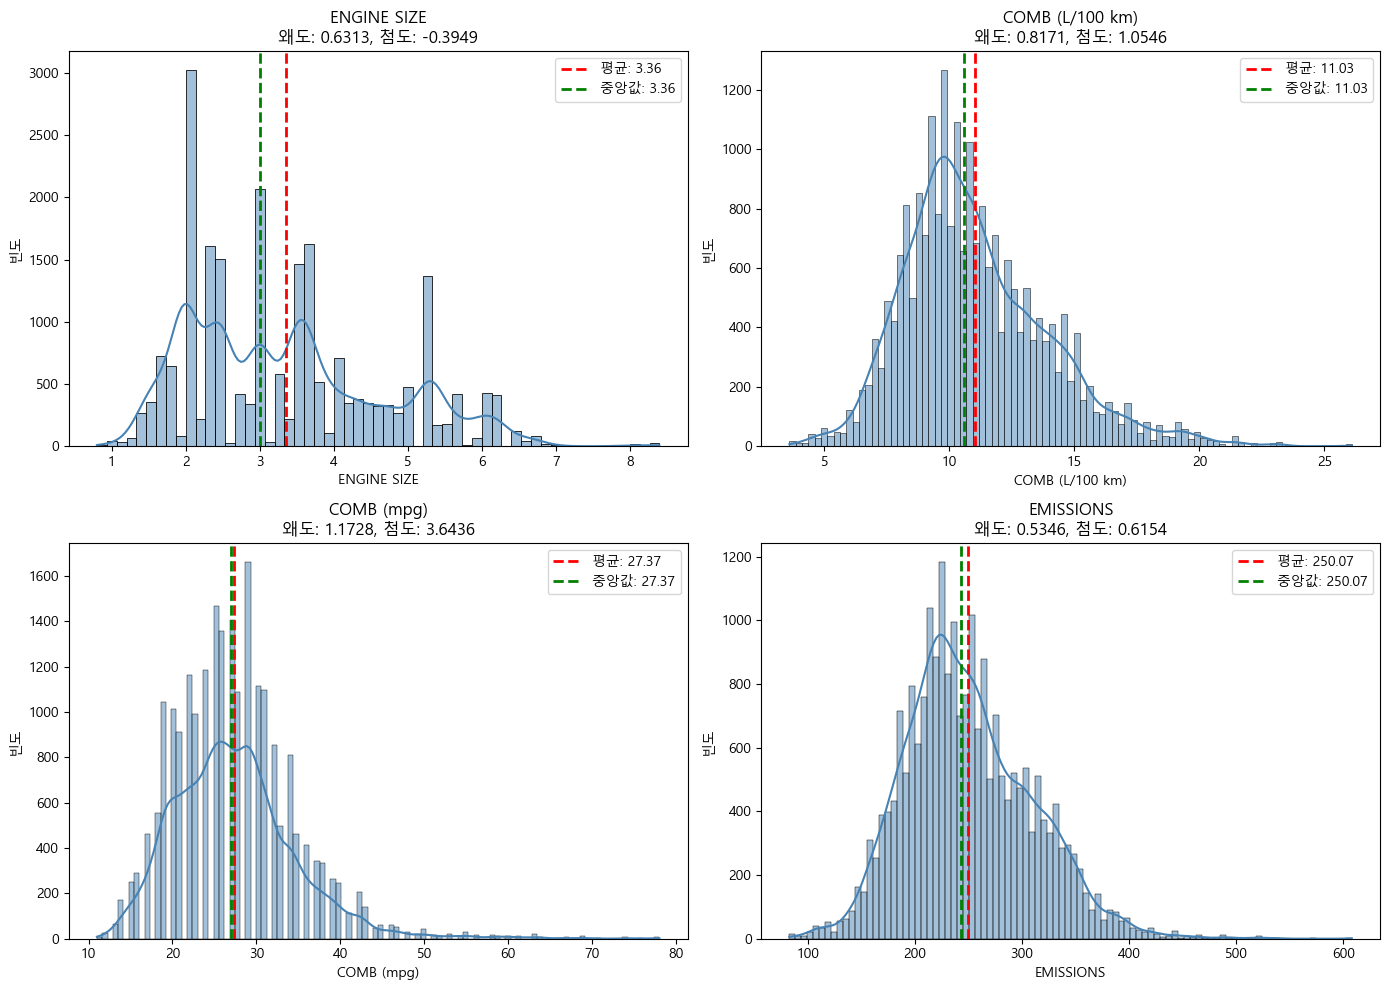

,왜도,첨도,왜도 해석,첨도 해석
FUEL,,,,
D,-0.3677,-1.0428,왼쪽 꼬리,꼬리가 얇음
E,-0.1893,-0.2563,왼쪽 꼬리,꼬리가 얇음
N,-1.8518,3.0713,왼쪽 꼬리,꼬리가 두꺼움
X,0.3305,-0.2929,오른쪽 꼬리,꼬리가 얇음
Z,0.9972,1.6075,오른쪽 꼬리,꼬리가 두꺼움




결과 해석:
1) ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS 4가지 모두 양의 왜도이다.
→ 그래프에서도 오른쪽으로 꼬리가 긴 분포를 확인할 수 있다.

2) N(천연가스)의 경우, 왜도:-1.8518, 첨도: 3.0713 로
그래프를 그린다면 대부분의 차량이 높은 배출량 구간에 많이 몰려있을 것이라 예상할 수 있다.



In [21]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
for col in numeric_cols:
    print(f"{col}")
    print(f"왜도: {df[col].skew():.4f}")
    print(f"첨도: {df[col].kurt():.4f}")
    print()
print('='*50)

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
df3 = df[numeric_cols].agg(['skew', 'kurt']).T  # 전치
df3.columns = ['왜도', '첨도']
df3 = df3.round(4)

# 해석 컬럼 추가
def interpret_skew(value):
    if value > 0:
        return '오른쪽 꼬리'
    elif value < 0:
        return '왼쪽 꼬리'
    else:
        return '대칭적'

def interpret_kurt(value):
    if value > 0:
        return '꼬리가 두꺼움'
    elif value < 0:
        return '꼬리가 얇음'
    else:
        return '정규분포와 동일'

df3['왜도 해석'] = df3['왜도'].apply(interpret_skew)
df3['첨도 해석'] = df3['첨도'].apply(interpret_kurt)

display(df3)
print("\n" + '='*50)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # 2D 배열을 1D로 변환

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]

    sns.histplot(data=df, x=col, kde=True, color='steelblue', ax=ax)

    # 왜도/첨도 계산
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    
    # 평균/중앙값 계산
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    # 평균선 (빨강)
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_val:.2f}')
    
    #중앙값 선 (초록)
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'중앙값: {mean_val:.2f}')
    
    # 제목에 왜도/첨도 표시
    ax.set_title(f'{col}\n왜도: {skew_val:.4f}, 첨도: {kurt_val:.4f}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('빈도')
    ax.legend()


plt.tight_layout()
plt.show()
print("\n" + '='*50)

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_stats = df.groupby('FUEL')['EMISSIONS'].agg([
    ('왜도', 'skew'),
    ('첨도', lambda x: x.kurt())  # 과제 레포지토리에서는 오류나서 lambda 함수 사용
    ]).round(4)

# 해석 컬럼 추가
fuel_stats['왜도 해석'] = fuel_stats['왜도'].apply(interpret_skew)
fuel_stats['첨도 해석'] = fuel_stats['첨도'].apply(interpret_kurt)

display(fuel_stats)
print("\n" + '='*50)


# TODO 5: 결과 해석
print(
"""
결과 해석:
1) ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS 4가지 모두 양의 왜도이다.
→ 그래프에서도 오른쪽으로 꼬리가 긴 분포를 확인할 수 있다.

2) N(천연가스)의 경우, 왜도:-1.8518, 첨도: 3.0713 로
그래프를 그린다면 대부분의 차량이 높은 배출량 구간에 많이 몰려있을 것이라 예상할 수 있다.
"""
)

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [22]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    return sum(data) / len(data)


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    sorted_data = sorted(data)
    num = int(len(sorted_data) * proportion)
    result = sorted_data[num:len(data)-num]
    return sum(result) / len(result)


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    weighted_num = 0
    for i, j in zip(data, weights):
        weighted_num += i * j
    return weighted_num / sum(weights)


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] +sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    freq = {}
    for value in data:
        if value in freq:
            freq[value] += 1
        else:
            freq[value] = 1
    
    max_count = max(freq.values())
    
    for value in data:
        if freq[value] == max_count:
            return value
    


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    avg_data = sum(data) / len(data)
    diff_data = 0
    
    for num in data:
        diff_data += (num - avg_data)**2
    return diff_data / (len(data) - ddof)


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    avg_data = sum(data) / len(data)
    diff_data = 0
    
    for num in data:
        diff_data += (num - avg_data)**2
    return math.sqrt(diff_data / (len(data) - ddof))


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    sorted_data = sorted(data)
    idx = round(q / 100 * (len(sorted_data)-1))
    return sorted_data[idx]


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    sorted_data = sorted(data)
    idx_75 = round(75 / 100 * (len(sorted_data)-1))
    idx_25 = round(25 / 100 * (len(sorted_data)-1))
    return sorted_data[idx_75] - sorted_data[idx_25]

In [23]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
